## Graph Theory and Network Composition

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)
G.add_nodes_from([2, 3])

G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])

In [5]:
print('Order: ',G.order())
print('Number of nodes: ',G.number_of_nodes())
print('Size: ',G.size())
print('Number of edges: ',G.number_of_edges())

Order:  3
Number of nodes:  3
Size:  2
Number of edges:  2


In [6]:
print('Average degree: ',sum(dict(G.degree()).values())/G.order())

Average degree:  1.3333333333333333


In [18]:
print('Density: ',nx.density(G))
print('Diameter: ',nx.diameter(G))
print('Average shortest path length: ',nx.average_shortest_path_length(G))

Density:  0.6666666666666666
Diameter:  2
Average shortest path length:  1.3333333333333333


In [19]:
betweenness = nx.betweenness_centrality(G, weight='edge')
closeness = nx.closeness_centrality(G, distance='edge')
eigenvector = nx.eigenvector_centrality_numpy(G)
degree = nx.degree_centrality(G)
pagerank = nx.pagerank(G)

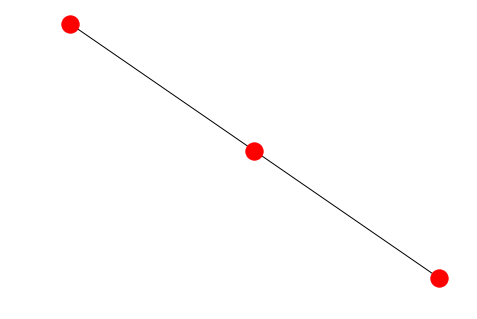

In [22]:
nx.draw(G)

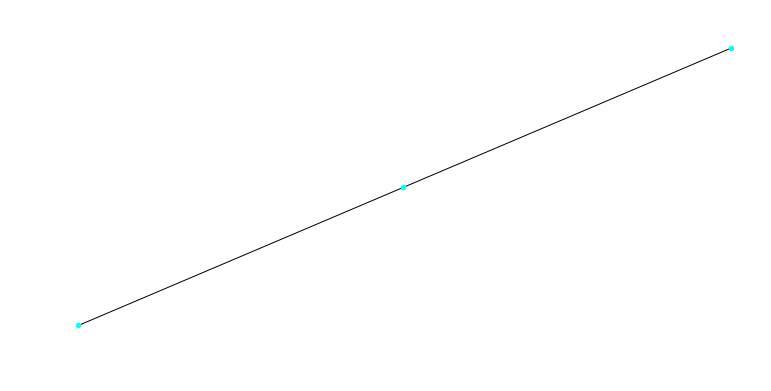

In [23]:
plt.figure(figsize=(10,5))
nx.draw(G, node_size=20, node_color='cyan')

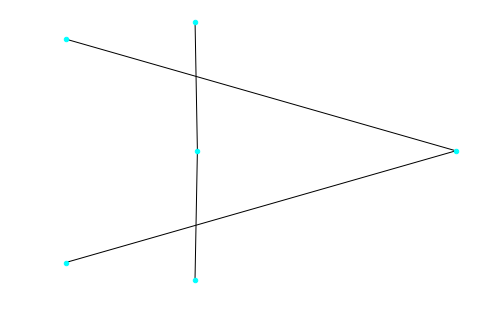

In [26]:
nx.draw_circular(G, node_size=20, node_color='cyan')

nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

In [34]:
# NXVIZ module
# $ pip3 install --user nxviz

from nxviz import CircosPlot
from nxviz import MatrixPlot
from nxviz import ArcPlot

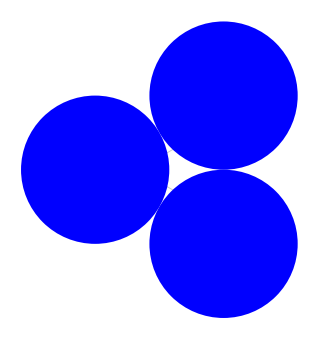

In [35]:
# Circos Plot
c = CircosPlot(G)
c.draw()

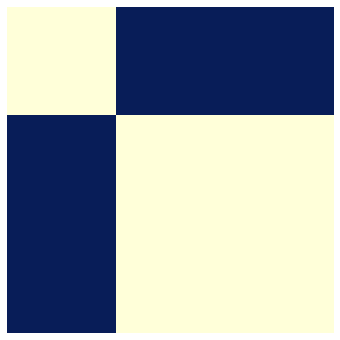

In [36]:
# Matrix PLots
m = MatrixPlot(G)
m.draw()

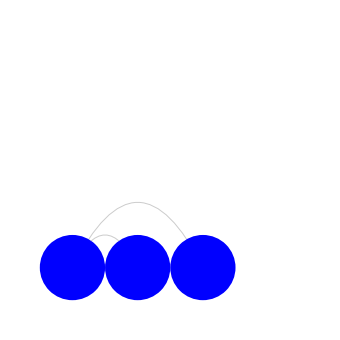

In [37]:
#Arc Plots
a = ArcPlot(G)
a.draw()

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


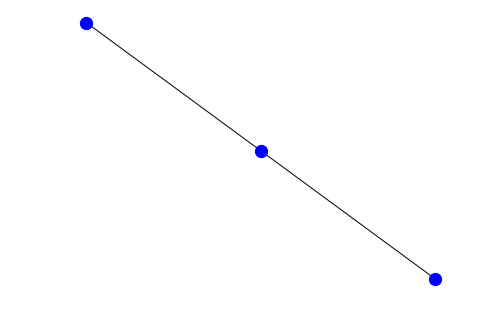

In [52]:
# Subgraphs

ego = nx.ego_graph(G,1,radius=2)
pos = nx.spring_layout(ego)
plt.figure()
nx.draw(ego,pos,node_color='b',node_size=150)
plt.show()

In [54]:
# Community detection

import community

In [55]:
parts = community.best_partition(G)

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


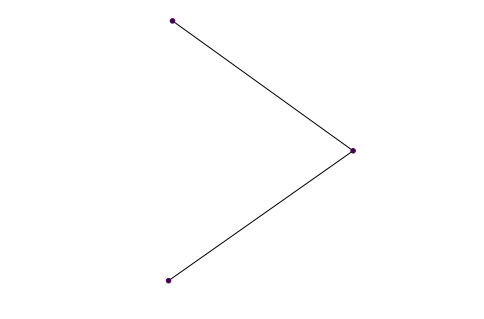

In [56]:
values = list(parts.values())
nx.draw_kamada_kawai(G, node_size=20, node_color=values)